<a href="https://colab.research.google.com/github/duonghiepit/logistic-regression/blob/main/2_LogReg_Minibatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/AIO2023/231006/code - update_1

/content/drive/MyDrive/AIO2023/231006/code - update_1


In [2]:
from numpy.lib.function_base import interp
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_full.csv',
                     dtype=None,
                     delimiter=',',
                     skip_header=1)

X = iris[:, :4]
y = iris[:, 4]

intercept = np.ones((X.shape[0], 1))
X_b = np.c_[intercept, X]
m = X.shape[0]

print('X_b', X_b.shape)
print('y', y.shape)
print('m', m)

X_b (100, 5)
y (100,)
m 100


In [3]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return sigmoid_function(np.dot(X, theta))

def loss_function(y_hat, y):
    return (-y*np.log(y_hat) - (1 - y)*np.log(1-y_hat))

In [4]:
lr = 0.01
num_iter = 100
mini_batch = 32

theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])

losses = []
preds = []
accs = []

for i in range(num_iter):
    shuffled_indices = np.random.permutation(m)   # m = X.shape[0]
    X_b_shuffled     = X_b[shuffled_indices]
    y_shuffled       = y[shuffled_indices]

    for i in range(0, m, mini_batch):
        xi = X_b[i:i+mini_batch]
        yi = y[i:i+mini_batch]

        # compute y_hat
        y_hat = predict(xi, theta)

        # compute loss
        loss = loss_function(y_hat, yi)

        # compute gradient
        gradient = np.dot(xi.T, (y_hat - yi))

        # update
        theta = theta - lr*gradient

        # =======================
        # loss
        losses.append(loss)

        # accuracy
        preds = y_hat.round()
        acc = (preds==yi).mean()
        accs.append(acc)

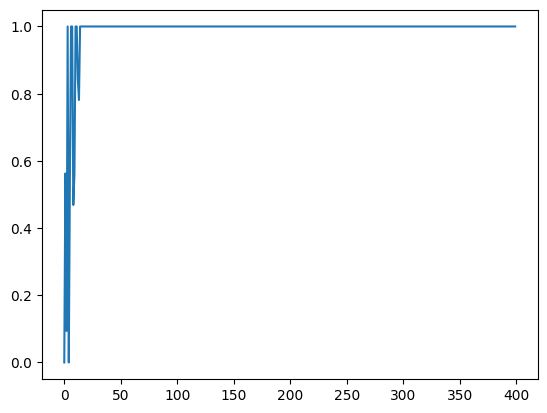

In [7]:
plt.plot(accs)
plt.show()

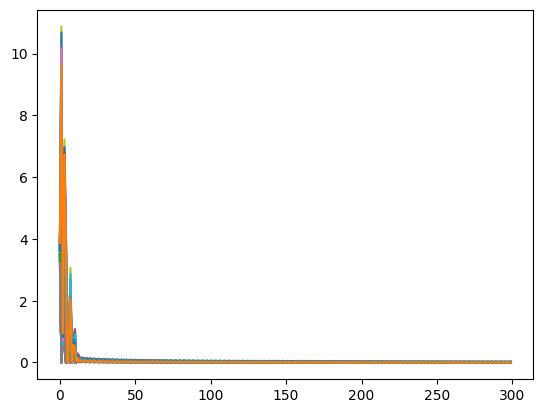

In [12]:
l = [losses[i] for i in range(len(losses)) if losses[i].shape[0]==32]
plt.plot(l)
plt.show()